In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline
plt.rcParams['axes.linewidth'] = 2

In [71]:
df = pd.read_csv("data/us_perm_visas.csv", parse_dates=True)
df = df.infer_objects()
shape = df.shape
print(shape)
print(df.dtypes)

(374362, 154)
add_these_pw_job_title_9089       object
agent_city                        object
agent_firm_name                   object
agent_state                       object
application_type                  object
                                  ...   
wage_offer_to_9089                object
wage_offer_unit_of_pay_9089       object
wage_offered_from_9089           float64
wage_offered_to_9089             float64
wage_offered_unit_of_pay_9089     object
Length: 154, dtype: object


In [64]:
df.case_status.value_counts(dropna=False)

Certified            181933
Certified-Expired    148586
Denied                25649
Withdrawn             18194
Name: case_status, dtype: int64

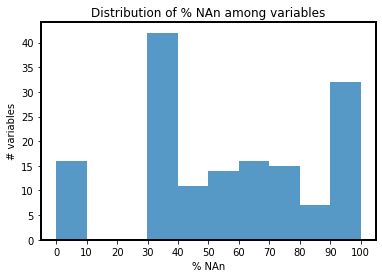

In [65]:
pct_na = (df.drop('case_status', 1).isna().sum() / shape[0]) * 100

counts, bins, patches = plt.hist(pct_na, 10, alpha = 0.75)

plt.xticks(np.arange(0, 101, 10))
plt.title('Distribution of % NAn among variables')
plt.xlabel('% NAn')
plt.ylabel('# variables')
plt.show()

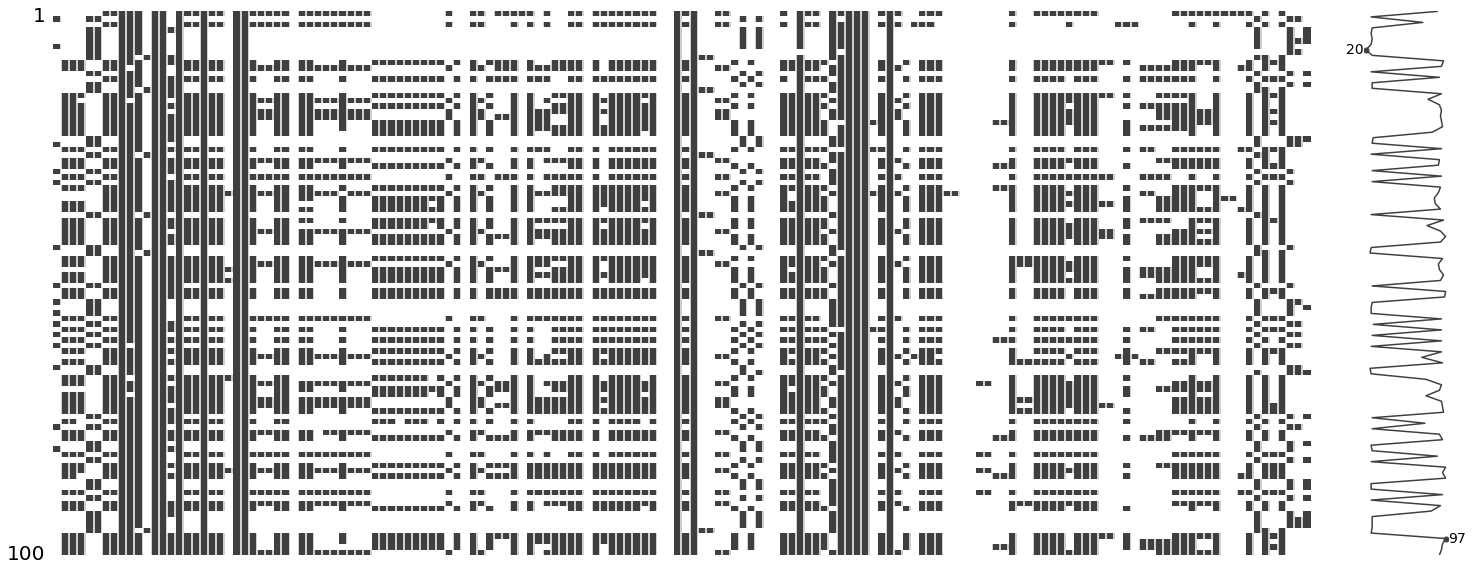

In [68]:
df_sample = df.sample(100)

msno.matrix(df_sample)
plt.show()

In [69]:
h1_b = df['class_of_admission']=='H-1B'
df = df[h1_b]
df.class_of_admission.value_counts(dropna=False)

H-1B    283018
Name: class_of_admission, dtype: int64

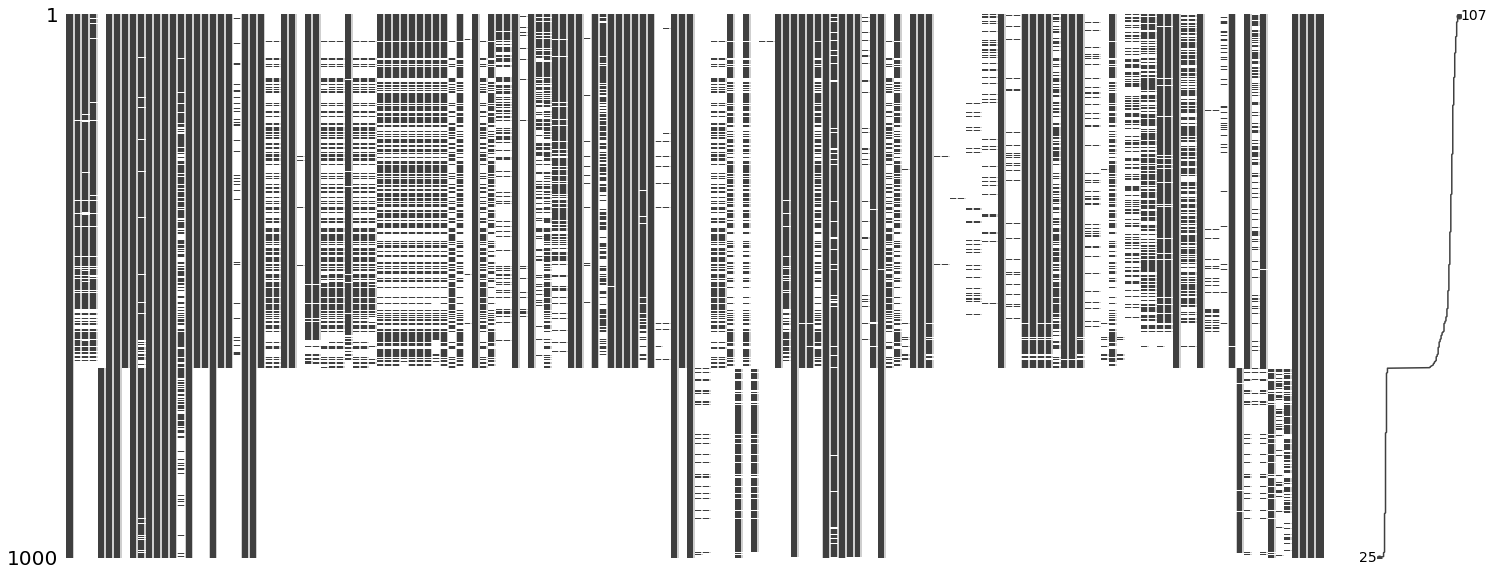

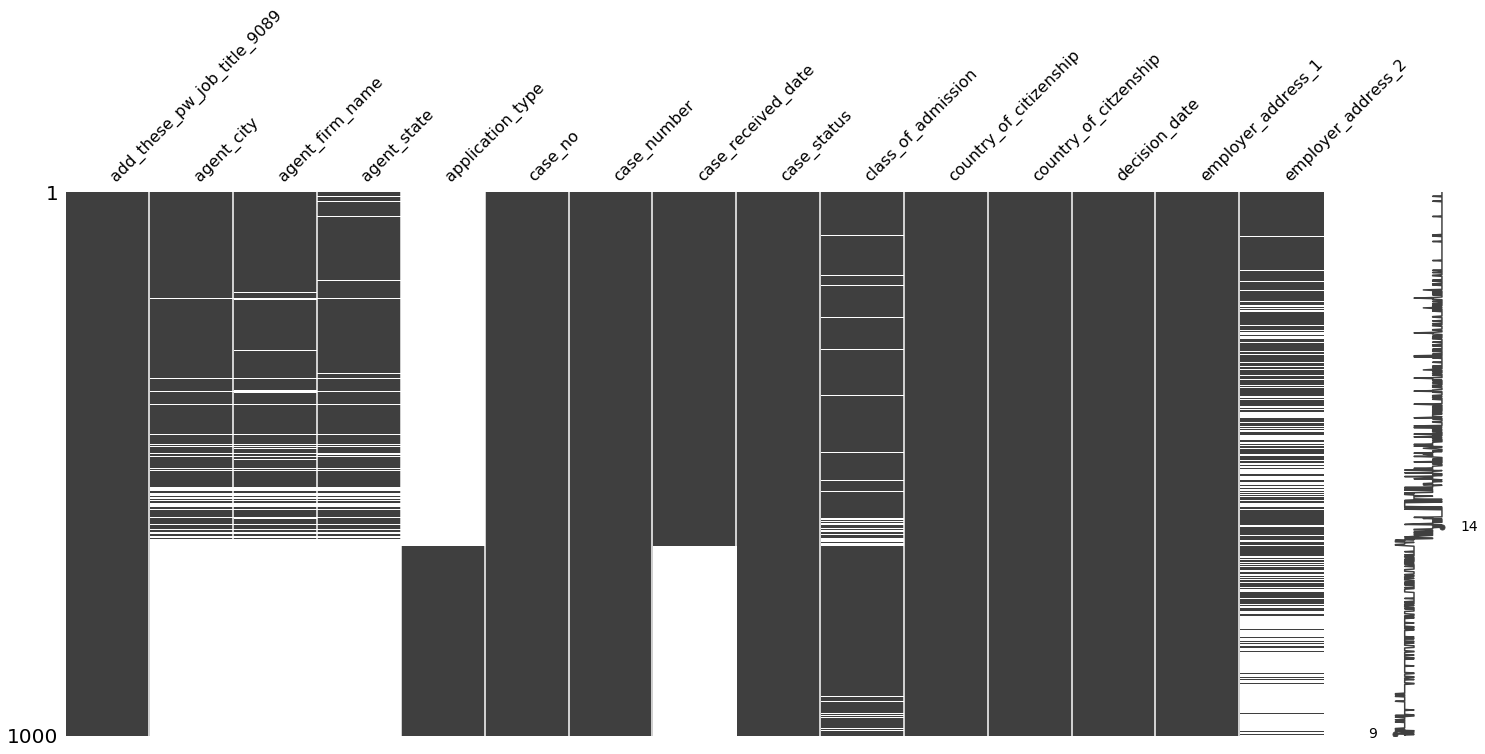

In [85]:
df_sample = df.sample(1000)
df_sample['null_count'] = df_sample.isnull().sum(axis=1)
df_sample = df_sample.sort_values(by = 'null_count')

msno.matrix(df_sample)
plt.show()
msno.matrix(df_sample.iloc[ : , 0:15])
plt.show()

(211463, 157)


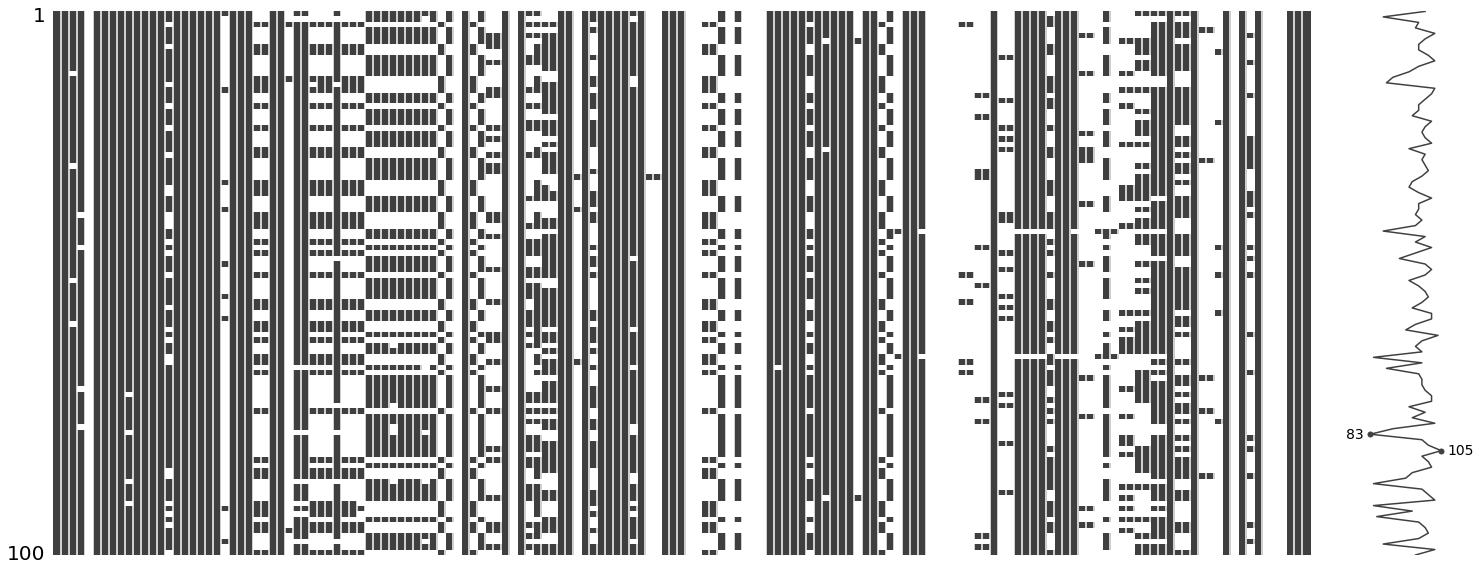

In [101]:
agent = pd.notnull(df['agent_firm_name']) | pd.notnull(df['agent_city']) | pd.notnull(df['agent_state'])

df = df[agent]

print(df.shape)

msno.matrix(df.sample(100))
plt.show()

(211463, 120)


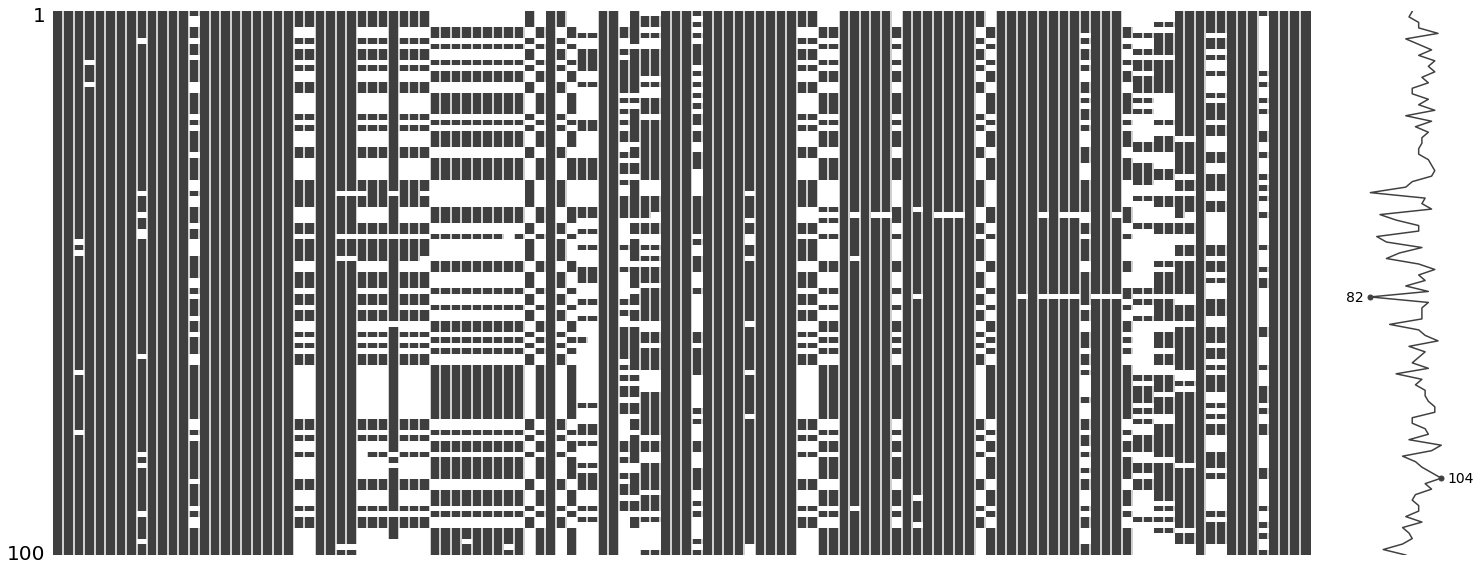

In [104]:
df = df[df.columns[df.isnull().mean() < 0.8]]
print(df.shape)

msno.matrix(df.sample(100))
plt.show()

In [105]:
list(df.columns)

['add_these_pw_job_title_9089',
 'agent_city',
 'agent_firm_name',
 'agent_state',
 'case_no',
 'case_number',
 'case_received_date',
 'case_status',
 'class_of_admission',
 'country_of_citizenship',
 'country_of_citzenship',
 'decision_date',
 'employer_address_1',
 'employer_address_2',
 'employer_city',
 'employer_country',
 'employer_decl_info_title',
 'employer_name',
 'employer_num_employees',
 'employer_phone',
 'employer_postal_code',
 'employer_state',
 'employer_yr_estab',
 'foreign_worker_info_alt_edu_experience',
 'foreign_worker_info_birth_country',
 'foreign_worker_info_city',
 'foreign_worker_info_education',
 'foreign_worker_info_inst',
 'foreign_worker_info_major',
 'foreign_worker_info_postal_code',
 'foreign_worker_info_rel_occup_exp',
 'foreign_worker_info_req_experience',
 'foreign_worker_info_state',
 'foreign_worker_info_training_comp',
 'foreign_worker_ownership_interest',
 'foreign_worker_yr_rel_edu_completed',
 'fw_info_alt_edu_experience',
 'fw_info_birth_cou

In [99]:
df['country_of_citizenship'] = df.country_of_citizenship.fillna('')
df['country_of_citzenship'] = df.country_of_citzenship.fillna('')
coc_combined = df['country_of_citizenship'] + df['country_of_citzenship']

df['add_these_pw_job_title_9089'] = df.country_of_citizenship.fillna('')
df['pw_job_title_9089'] = df.country_of_citzenship.fillna('')
job_combined = df['pw_job_title_9089'] + df['add_these_pw_job_title_9089']

df['coc_combined'] = combined_coc
df['job_combined'] = job_combined